<a href="https://colab.research.google.com/github/tsheltonking/Transfer-Learning-For-Pneumonia-Detection/blob/master/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Summary

>Retrain the inception v3 image classifier on pneumonia dataset using Tensorflow+Keras. Show the training process as well as two examples of it making predictions on images from the testing dataset.

# Fetching Data & Dependencies

In [52]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 1.14.0


Download the dataset manually [here](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/data) or see instructions on how to get your [Kaggle API Token](https://github.com/Kaggle/kaggle-api) and add the resulting `.json` to your project directory before running the following:

In [0]:
# Fetches the dataset.

with open('kaggle.json') as f:
    d = json.load(f)
os.environ['KAGGLE_USERNAME'] = d["username"]
os.environ['KAGGLE_KEY'] = d["key"]

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip
os.remove('chest-xray-pneumonia.zip')

# Data Preprocessing

## Assigning Paths

In [0]:
# Set Paths for Data
data_dir = "chest_xray/chest_xray/"
train_dir = os.path.join(data_dir, "train")
validation_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

## Exploration

In [0]:
# Plot images for comparison
def plot_images(path="test", kind="normal", num=6):
  
  plt.figure(figsize=(10, 8))
  full_path = data_dir + path + '/' + kind
  i=0
  for file in os.listdir(full_path):
    if file.endswith(".jpeg"):
      if i >= num:
          break
  
      img = mpimg.imread(full_path+"/"+file)
      plt.subplot(231+i)
      plt.title(file.split('.')[0])
      imgplot = plt.imshow(img)
      i=i+1

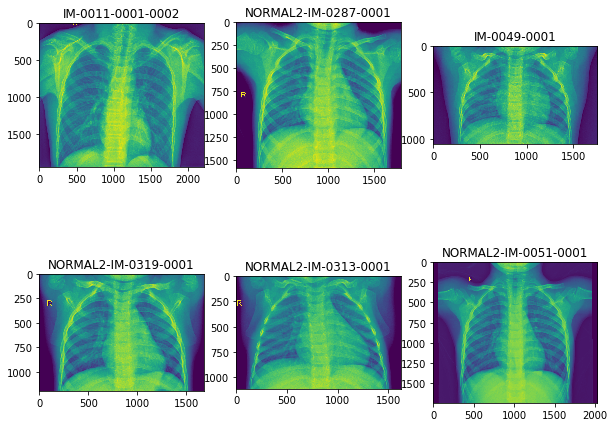

In [63]:
plot_images("test", "NORMAL")

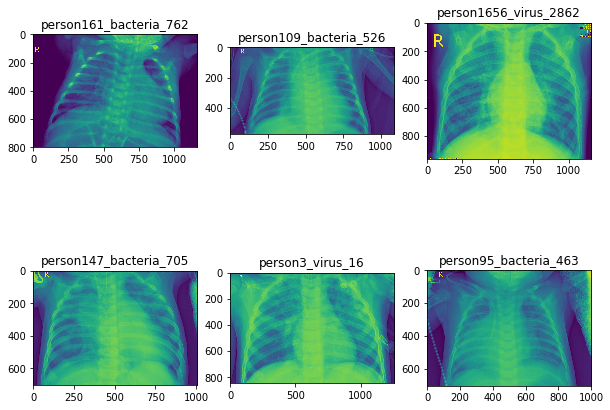

In [62]:
plot_images("test", "PNEUMONIA")

## Preparation

# Modeling